In [19]:
%run "13 - Full CGE with Trade.ipynb"

# Calibration

In [20]:
mod = CGEModel(
    variables=all_variables,
    parameters=all_parameters,
    equations=all_equations,
    coords=coords,
    parse_equations_to_sympy=True,
    backend="pytensor",
    mode="JAX",
    use_sparse_matrices=True,
    compile=True,
)

ValueError: Could not standardize equation "Government budget constraint":
Eq(G + S_G, E_H_d*P_E*tau_E_H + K_s*r*tau_r_income + L_s*tau_w_income*w + Sum(P_E*E_E_d[k]*tau_E_E[k], (k, 0, 8)) + Sum(P_E*E_d[i]*tau_E[i], (i, 0, 2)) + Sum(r*K_E_d[k]*tau_r_E[k], (k, 0, 8)) + Sum(r*K_d[i]*tau_r[i], (i, 0, 2)) + Sum(w*L_E_d[k]*tau_w_E[k], (k, 0, 8)) + Sum(w*L_d[i]*tau_w[i], (i, 0, 2)) + Sum(C_D[i]*P_Y[i]*tau_C_D[i], (i, 0, 2)) + Sum(C_G_D[i]*P_Y[i]*tau_C_G_D[i], (i, 0, 2)) + Sum(C_G_M[i]*P_M[i]*tau_C_G_M[i], (i, 0, 2)) + Sum(C_M[i]*P_M[i]*tau_C_M[i], (i, 0, 2)) + Sum(Ex[i]*P_Y[i]*tau_Ex[i], (i, 0, 2)) + Sum(Ex_E[k]*P_Y_E[k]*tau_Ex_E[k], (k, 0, 8)) + Sum(I_D_d[i]*P_Y[i]*tau_I_D[i], (i, 0, 2)) + Sum(I_E_D_d[k]*P_Y_E[k]*tau_I_E_D[k], (k, 0, 8)) + Sum(I_E_M_d[k]*P_M_E[k]*tau_I_E_M[k], (k, 0, 8)) + Sum(I_M_d[i]*P_M[i]*tau_I_M[i], (i, 0, 2)) + Sum(M[i]*P_M[i]*tau_M[i], (i, 0, 2)) + Sum(M_E[k]*P_M_E[k]*tau_M_E[k], (k, 0, 8)) + Sum(P_M_E[k]*Y_E_M_d[k]*tau_G_M[k], (k, 0, 8)) + Sum(P_Y[i]*Y[i]*tau_Y[i], (i, 0, 2)) + Sum(P_Y_E[k]*Y_E[k]*tau_Y_E[k], (k, 0, 8)) + Sum(P_Y_E[k]*Y_E_D_d[k]*tau_G_D[k], (k, 0, 8)) + Sum(P_M[i]*X_E_M[i, k]*tau_X_E_M[i, k], (i, 0, 2), (k, 0, 8)) + Sum(P_M[i]*X_M[i, j]*tau_X_M[i, j], (i, 0, 2), (j, 0, 2)) + Sum(P_Y[i]*X_D[i, j]*tau_X_D[i, j], (i, 0, 2), (j, 0, 2)) + Sum(P_Y[i]*X_E_D[i, k]*tau_X_E_D[i, k], (i, 0, 2), (k, 0, 8)))

Encountered the following error:
too many values to unpack (expected 2)

In [3]:
df_jittered = df + 1e-6

In [4]:
initial_data = {
    "income_tax_revenue": df_jittered.loc[("Tax", "Income"), "Factors"],
    "production_tax_revenue": df_jittered.loc[("Tax", "Production"), "Activities"].loc[
        sector_codes
    ],
    "factor_tax_revenue": df_jittered.loc["Factor Tax", "Activities"].loc[:, sector_codes],
    "domestic_sales_tax_revenue": df_jittered.loc["Domestic Sales Tax", "Institution"].loc[
        sector_codes
    ],
    "domestic_VAT_tax_revenue": df_jittered.loc["Domestic Sales Tax", "Activities"].loc[
        sector_codes, sector_codes
    ],
    "import_sales_tax_revenue": df_jittered.loc["Import Sales Tax", "Institution"].loc[
        sector_codes
    ],
    "import_VAT_tax_revenue": df_jittered.loc["Import Sales Tax", "Activities"].loc[
        sector_codes, sector_codes
    ],
    "import_duty_revenue": df_jittered.loc[("Tax", "Import Duty"), "Imported Commodities"].loc[
        sector_codes
    ],
    "export_duty_revenue": df_jittered.loc[("Tax", "Export Duty"), "Domestic Commodities"].loc[
        sector_codes
    ],
    "energy_production_tax_revenue": df_jittered.loc[("Tax", "Production"), "Activities"].loc[
        energy_codes
    ],
    "energy_domestic_VAT_tax_revenue": df_jittered.loc["Domestic Sales Tax", "Activities"].loc[
        sector_codes, energy_codes
    ],
    "energy_domestic_sales_tax_revenue": df_jittered.loc["Domestic Sales Tax", "Institution"].loc[
        energy_codes
    ],
    "energy_import_VAT_tax_revenue": df_jittered.loc["Import Sales Tax", "Activities"].loc[
        sector_codes, energy_codes
    ],
    "energy_import_sales_tax_revenue": df_jittered.loc["Import Sales Tax", "Institution"].loc[
        energy_codes
    ],
    "energy_import_duty_revenue": df_jittered.loc[
        ("Tax", "Import Duty"), "Imported Commodities"
    ].loc[energy_codes],
    "energy_export_duty_revenue": df_jittered.loc[
        ("Tax", "Import Duty"), "Domestic Commodities"
    ].loc[energy_codes],
    "energy_factor_tax_revenue": df_jittered.loc["Factor Tax", "Activities"].loc[:, energy_codes],
    "factor_demand": df_jittered.loc["Factors", "Activities"].loc[:, sector_codes],
    "X": df_jittered.loc["Domestic Commodities", "Activities"].loc[sector_codes, sector_codes],
    "X_M": df_jittered.loc["Imported Commodities", "Activities"].loc[sector_codes, sector_codes],
    "Y": df_jittered["Activities"].loc[:, sector_codes].sum(axis=0),
    "M": df_jittered.loc[:, "Imported Commodities"].loc[:, sector_codes].sum(axis=0),
    "energy_factor_demand": df_jittered.loc["Factors", "Activities"].loc[:, energy_codes],
    "X_E": df_jittered.loc["Domestic Commodities", "Activities"].loc[sector_codes, energy_codes],
    "X_E_M": df_jittered.loc["Imported Commodities", "Activities"].loc[sector_codes, energy_codes],
    "Y_E": df_jittered["Activities"].loc[:, energy_codes].sum(axis=0),
    "M_E": df_jittered.loc[:, "Imported Commodities"].loc[:, energy_codes].sum(axis=0),
    "Ex": df_jittered.loc["Domestic Commodities", ("Trade", "Rest of World")].loc[sector_codes],
    "Ex_E": df_jittered.loc["Domestic Commodities", ("Trade", "Rest of World")].loc[energy_codes],
    "household_electricity_demand": df_jittered.loc[
        ("Factors", "Electricity"), ("Institution", "Household")
    ],
    "household_electricity_tax_revenue": df_jittered.loc[
        ("Factor Tax", "Electricity"), ("Institution", "Household")
    ],
    "domestic_institution_demand": df_jittered.loc["Domestic Commodities", "Institution"].loc[
        sector_codes
    ],
    "import_institution_demand": df_jittered.loc["Imported Commodities", "Institution"].loc[
        sector_codes
    ],
    "energy_domestic_institution_demand": df_jittered.loc[
        "Domestic Commodities", "Institution"
    ].loc[energy_codes],
    "energy_import_institution_demand": df_jittered.loc["Imported Commodities", "Institution"].loc[
        energy_codes
    ],
    "supply_of_savings": df_jittered.loc[("Institution", "Investment")],
    "T": df_jittered.loc[("Factors", "Labor"), ("Activities")].sum() / 0.6,
}


def initialize_parameter(name, mod, value=5.0):
    dims = mod.get(name).dims
    size = [len(mod.coords[dim]) for dim in dims]
    return np.full(size, value)


econometric_estimates = {
    "Theta": 1.0,
    "sigma_C": 1.5,
}
for name in [
    "epsilon_VA",
    "epsilon_KE",
    "epsilon_KE_E",
    "epsilon_VA_E",
    "epsilon_G",
    "epsilon_C",
    "epsilon_CE",
    "epsilon_C_G",
    "epsilon_C_M",
    "epsilon_GM",
    "epsilon_I_E_M",
    "epsilon_I_M",
    "epsilon_X",
    "epsilon_X_E",
]:
    econometric_estimates[name] = initialize_parameter(name, mod, value=0.5)

In [5]:
def calibrate_DX(output, inputs, inputs_price, epsilon):
    rho = (epsilon - 1) / epsilon
    input_purchase_value = inputs_price * inputs ** (1 / epsilon)
    alpha = input_purchase_value / input_purchase_value.sum()
    A = output / (alpha * inputs**rho).sum() ** (1 / rho)

    return A, alpha

## Calibration Function

In [6]:
def calibrate_model(
    *,
    income_tax_revenue,
    production_tax_revenue,
    factor_tax_revenue,
    domestic_sales_tax_revenue,
    domestic_VAT_tax_revenue,
    import_sales_tax_revenue,
    import_VAT_tax_revenue,
    import_duty_revenue,
    export_duty_revenue,
    energy_production_tax_revenue,
    energy_domestic_VAT_tax_revenue,
    energy_domestic_sales_tax_revenue,
    energy_import_VAT_tax_revenue,
    energy_import_sales_tax_revenue,
    energy_factor_tax_revenue,
    energy_import_duty_revenue,
    energy_export_duty_revenue,
    factor_demand,
    X,
    X_M,
    Y,
    M,
    domestic_institution_demand,
    import_institution_demand,
    energy_factor_demand,
    X_E,
    X_E_M,
    Y_E,
    M_E,
    Ex,
    Ex_E,
    energy_domestic_institution_demand,
    energy_import_institution_demand,
    household_electricity_demand,
    household_electricity_tax_revenue,
    supply_of_savings,
    T,
    epsilon_VA,
    epsilon_KE,
    epsilon_KE_E,
    epsilon_VA_E,
    epsilon_G,
    epsilon_C,
    epsilon_CE,
    epsilon_C_G,
    epsilon_C_M,
    epsilon_GM,
    epsilon_I_E_M,
    epsilon_I_M,
    epsilon_X,
    epsilon_X_E,
    Theta,
    sigma_C,
    mod,
):
    Y = Y.values
    Y_E = Y_E.values

    C = domestic_institution_demand["Household"]
    C_G = domestic_institution_demand["Government"]
    I_d = domestic_institution_demand["Investment"]

    C_M = import_institution_demand["Household"]
    C_G_M = import_institution_demand["Government"]
    I_d_M = import_institution_demand["Investment"]

    C = np.stack([C, C_M])
    C_G = np.stack([C_G, C_G_M])
    I_d = np.stack([I_d, I_d_M])
    X = np.stack([X, X_M])
    X_E = np.stack([X_E, X_E_M])

    I_E_d = energy_domestic_institution_demand["Investment"]
    I_E_M_d = energy_import_institution_demand["Investment"]
    Y_E_d = energy_domestic_institution_demand["Grid"]
    Y_E_M_d = energy_import_institution_demand["Grid"]

    I_E_d = np.stack([I_E_d, I_E_M_d])
    Y_E_d = np.stack([Y_E_d, Y_E_M_d])

    S = supply_of_savings[("Institution", "Household")]
    S_G = supply_of_savings[("Institution", "Government")]
    S_M = supply_of_savings[("Trade", "Rest of World")]

    L_d = factor_demand.loc["Labor", :]
    K_d = factor_demand.loc["Capital", :]
    L_E_d = energy_factor_demand.loc["Labor", :]
    K_E_d = energy_factor_demand.loc["Capital", :]
    E_d = factor_demand.loc["Electricity", :]
    E_E_d = energy_factor_demand.loc["Electricity", :]
    E_H_d = household_electricity_demand

    # taxes
    tau_C = (domestic_sales_tax_revenue["Household"] / C[0]).fillna(0.0)
    tau_I = (domestic_sales_tax_revenue["Investment"] / I_d[0]).fillna(0.0)
    tau_C_G = (domestic_sales_tax_revenue["Government"] / C_G[0]).fillna(0.0)

    tau_C_M = (import_sales_tax_revenue["Household"] / C[1]).fillna(0.0)
    tau_I_M = (import_sales_tax_revenue["Investment"] / I_d[1]).fillna(0.0)
    tau_C_G_M = (import_sales_tax_revenue["Government"] / C_G[1]).fillna(0.0)

    tau_C = np.stack([tau_C, tau_C_M])
    tau_I = np.stack([tau_I, tau_I_M])
    tau_C_G = np.stack([tau_C_G, tau_C_G_M])

    tau_E = (factor_tax_revenue.loc["Electricity"] / factor_demand.loc["Electricity"]).fillna(0.0)
    tau_E_H = household_electricity_tax_revenue / E_H_d
    tau_E_E = (energy_factor_tax_revenue.loc["Electricity"] / E_E_d).fillna(0.0)

    tau_I_E = (energy_domestic_sales_tax_revenue["Investment"] / I_E_d[0]).fillna(0.0)
    tau_I_E_M = (energy_import_sales_tax_revenue["Investment"] / I_E_d[0]).fillna(0.0)
    tau_I_E = np.stack([tau_I_E, tau_I_E_M])

    tau_X = (domestic_VAT_tax_revenue / X[0]).fillna(0.0)
    tau_X_M = (import_VAT_tax_revenue / X[1]).fillna(0.0)
    tau_X = np.stack([tau_X, tau_X_M])

    tau_Y = (production_tax_revenue / Y).fillna(0.0)

    tau_X_E = (energy_domestic_VAT_tax_revenue / X_E[0]).fillna(0.0)
    tau_X_E_M = (energy_import_VAT_tax_revenue / X_E[1]).fillna(0.0)
    tau_X_E = np.stack([tau_X_E, tau_X_E_M])

    tau_Ex = (export_duty_revenue / Ex).fillna(0.0).values
    tau_Ex_E = (energy_export_duty_revenue / Ex_E).fillna(0.0).values

    tau_M = (import_duty_revenue / M).fillna(0.0)
    tau_M_E = (energy_import_duty_revenue / M_E).fillna(0.0)

    tau_Y_E = (energy_production_tax_revenue / Y_E).fillna(0.0)

    tau_r = (factor_tax_revenue.loc["Capital"] / factor_demand.loc["Capital"]).fillna(0.0)
    tau_r_E = (
        energy_factor_tax_revenue.loc["Capital"] / energy_factor_demand.loc["Capital"]
    ).fillna(0.0)
    tau_w = (factor_tax_revenue.loc["Labor"] / factor_demand.loc["Labor"]).fillna(0.0)
    tau_w_E = (energy_factor_tax_revenue.loc["Labor"] / energy_factor_demand.loc["Labor"]).fillna(
        0.0
    )

    tau_G = (energy_domestic_sales_tax_revenue["Grid"] / Y_E_d[0]).fillna(0.0)
    tau_G_M = (energy_import_sales_tax_revenue["Grid"] / Y_E_d[1]).fillna(0.0)

    tau_G = np.stack([tau_G, tau_G_M])

    # # Normalize prices to 1
    w = 1.0
    r = 1.0

    P_E = initialize_parameter("P_E", mod, 1.0)
    P_KE = initialize_parameter("P_KE", mod, 1.0)
    P_VA = initialize_parameter("P_VA", mod, 1.0)
    P_VC = initialize_parameter("P_VC", mod, 1.0)
    P_Y = initialize_parameter("P_Y", mod, 1.0)
    P_Y_E = initialize_parameter("P_Y_E", mod, 1.0)
    P_KE_E = initialize_parameter("P_KE_E", mod, 1.0)
    P_VA_E = initialize_parameter("P_VA_E", mod, 1.0)
    P_VC_E = initialize_parameter("P_VC_E", mod, 1.0)
    P = initialize_parameter("P", mod, 1.0)
    P_CE = initialize_parameter("P_CE", mod, 1.0)
    P_C_G = initialize_parameter("P_C_G", mod, 1.0)
    P_I = initialize_parameter("P_I", mod, 1.0)
    P_I_E = initialize_parameter("P_I_E", mod, 1.0)
    P_M = initialize_parameter("P_M", mod, 1.0)
    P_M_E = initialize_parameter("P_M_E", mod, 1.0)
    P_X = initialize_parameter("P_X", mod, 1.0)
    P_X_E = initialize_parameter("P_X_E", mod, 1.0)
    P_bundled_C = initialize_parameter("P_bundled_C", mod, 1.0)
    P_bundled_Y_E = initialize_parameter("P_bundled_Y_E", mod, 1.0)

    P_C_bar = initialize_parameter("P_C_bar", mod, 0.0)
    P_E_H_bar = initialize_parameter("P_E_H_bar", mod, 0.0)

    # # Zero the residual
    resid = 0.0

    # # Factor supplies
    L_s = L_d.sum() + L_E_d.sum()
    K_s = K_d.sum() + K_E_d.sum()
    E_s = E_d.sum() + E_E_d.sum() + E_H_d
    F = T - L_s

    # # Numeraire
    P_num = w

    def compute_bundle(x, tax, p1, p2, p_out):
        return (x[0] * (1 + tax[0]) * p1 + x[1] * (1 + tax[1]) * p2) / p_out

    # # Import/Domestic Bundles
    X_bundled = compute_bundle(X, tau_X, P_Y[:, None], P_M[:, None], P_X)
    X_bundled_E = compute_bundle(X_E, tau_X_E, P_Y[:, None], P_M[:, None], P_X_E)

    C_bundled = compute_bundle(C, tau_C, P_Y, P_M, P_bundled_C)
    C_bundled_G = compute_bundle(C_G, tau_C_G, P_Y, P_M, P_C_G)
    I_bundle = compute_bundle(I_d, tau_I, P_Y, P_M, P_I)
    I_bundle_E = compute_bundle(I_E_d, tau_I_E, P_Y_E, P_M_E, P_I_E)
    Y_bundled_E = compute_bundle(Y_E_d, tau_G, P_Y_E, P_M_E, P_bundled_Y_E)

    # # Firm calibration
    KE = (K_d * (1 + tau_r) * r + E_d * (1 + tau_E) * P_E) / P_KE
    KE_E = (K_E_d * (1 + tau_r_E) * r + E_E_d * (1 + tau_E_E) * P_E) / P_KE_E

    VA = (KE * P_KE + (1 + tau_w) * w * L_d) / P_VA
    VA_E = (KE_E * P_KE_E + (1 + tau_w_E) * w * L_E_d) / P_VA_E

    VC = (P_X * X_bundled).sum(axis=0) / P_VC
    VC_E = (P_X_E * X_bundled_E).sum(axis=0) / P_VC_E

    Y = (P_VA * VA + P_VC * VC) / ((1 - tau_Y) * P_Y)
    Y_E = (P_VA_E * VA_E + P_VC_E * VC_E) / ((1 - tau_Y_E) * P_Y_E)

    # # Final good sector Armington bundle
    A_X, alpha_X = calibrate_two_good_CES(
        fac1=X[0],
        fac2=X[1],
        p1=(1 + tau_X[0]) * P_Y[:, None],
        p2=(1 + tau_X[1]) * P_M[:, None],
        output=X_bundled,
        epsilon=epsilon_X,
    )

    # # Final good sector Value Add
    A_VA, alpha_VA = calibrate_two_good_CES(
        fac1=KE, fac2=L_d, p1=P_KE, p2=(1 + tau_w) * w, output=VA, epsilon=epsilon_VA
    )
    A_KE, alpha_KE = calibrate_two_good_CES(
        fac1=K_d, fac2=E_d, p1=(1 + tau_r) * r, p2=(1 + tau_E) * P_E, output=KE, epsilon=epsilon_KE
    )

    # # Final good value chain
    psi_X = X_bundled / VC[None]

    # # Final good production function
    psi_VA = VA / Y
    psi_VC = VC / Y

    # # Energy sector Armington bundle
    A_X_E, alpha_X_E = calibrate_two_good_CES(
        fac1=X_E[0],
        fac2=X_E[1],
        p1=(1 + tau_X_E[0]) * P_Y[:, None],
        p2=(1 + tau_X_E[1]) * P_M[:, None],
        output=X_bundled_E,
        epsilon=epsilon_X_E,
    )

    # # Energy sector value add
    A_KE_E, alpha_KE_E = calibrate_two_good_CES(
        fac1=K_E_d,
        fac2=E_E_d,
        p1=(1 + tau_r_E) * r,
        p2=(1 + tau_E_E) * P_E,
        output=KE_E,
        epsilon=epsilon_KE_E,
    )

    A_VA_E, alpha_VA_E = calibrate_two_good_CES(
        fac1=KE_E, fac2=L_E_d, p1=P_KE_E, p2=(1 + tau_w_E) * w, output=VA_E, epsilon=epsilon_VA_E
    )

    # # Energy sector value chain
    psi_X_E = X_bundled_E / VC_E[None]

    # # Energy sector final output
    psi_VC_E = VC_E / Y_E
    psi_VA_E = VA_E / Y_E

    # # Grid Armington Bundle
    A_GM, alpha_GM = calibrate_two_good_CES(
        fac1=Y_E_d[0],
        fac2=Y_E_d[1],
        p1=(1 + tau_G[0]) * P_Y_E,
        p2=(1 + tau_G[1]) * P_M_E,
        output=Y_bundled_E,
        epsilon=epsilon_GM,
    )

    # # Grid final output
    A_G, alpha_G = calibrate_DX(E_s, Y_bundled_E, P_bundled_Y_E, epsilon_G)

    # Household
    w_income = w * L_s
    r_income = r * K_s

    income = w_income + r_income

    w_tax_revenue = income_tax_revenue["Labor"]
    r_tax_revenue = income_tax_revenue["Capital"]

    tau_w_income = w_tax_revenue / w_income
    tau_r_income = r_tax_revenue / r_income

    net_income = ((1 - tau_w_income) * w * L_s + (1 - tau_r_income) * r * K_s).sum()

    mpc = 1 - S / net_income
    consumption_spend = mpc * net_income

    C_total = (C_bundled * P_bundled_C).sum() / P
    CE = (C_total * P + (1 + tau_E_H) * P_E * E_H_d) / P_CE

    A_C_M, alpha_C_M = calibrate_two_good_CES(
        fac1=C[0],
        fac2=C[1],
        p1=(1 + tau_C[0]) * P_Y,
        p2=(1 + tau_C[1]) * P_M,
        output=C_bundled,
        epsilon=epsilon_C_M,
    )

    A_CE, alpha_CE = calibrate_two_good_CES(
        fac1=C_total,
        fac2=E_H_d,
        p1=P,
        p2=(1 + tau_E_H) * P_E,
        output=CE,
        epsilon=epsilon_CE,
    )

    A_C, alpha_C = calibrate_DX(C_total, C_bundled, P_bundled_C, epsilon_C)

    sigma_L = (sigma_C * np.log(CE) - np.log(w) + np.log(P_CE)) / np.log(F)
    U = C_total ** (1 - sigma_C) / (1 - sigma_C) + Theta * (T - L_s) ** (1 - sigma_L) / (
        1 - sigma_L
    )

    # import_sales_tax = ((tau_X[1] * P_M[:, None] * X[1]).sum(axis=0))
    #  + (tau_X_E[1] * P_M[:, None] * X_E[1]).sum() # Energy domestic VAT
    #  + (tau_G[1] * Y_E_d[1] * P_M_E).sum()  # Energy imported inputs to electricity production
    #  + (tau_I[1] * I_d[1] * P_M).sum()  # Tax on imported capital investment
    #  + (tau_I_E * I_E_d[1] * P_M_E).sum()  # Tax on imported energy capital investment
    #  + (tau_C_G[1] * P_M * C_G[1]).sum()  # Government consumption of imported goods
    # )

    # Domestic Sales Tax
    # Factor Tax
    # Export Duty
    # Import Duty
    # Income Tax
    # Production Tax

    # # # Exogenous government spending level
    tax_income = (
        # Firm taxes
        (tau_X[0] * P_Y[:, None] * X[0]).sum()  # Firm domestic VAT
        + (tau_X[1] * P_M[:, None] * X[1]).sum()  # Firm import VAT
        + (tau_w * L_d * w).sum()  # Firm payroll tax
        + (tau_r * K_d * r).sum()  # Firm capital use tax
        + (tau_E * E_d * P_E).sum()  # Firm electrity use tax
        + (tau_Y * P_Y * Y).sum()  # Firm output tax
        # # Energy producer taxes
        + (tau_X_E[0] * P_Y[:, None] * X_E[0]).sum()
        + (tau_X_E[1] * P_M[:, None] * X_E[1]).sum()  # Energy domestic VAT
        + (tau_w_E * L_E_d * w).sum()  # Energy import VAT
        + (tau_r_E * K_E_d * r).sum()  # Energy payroll tax
        + (tau_E_E * E_E_d * P_E).sum()  # Energy electricity use tax
        + (tau_Y_E * P_Y_E * Y_E).sum()  # Firm output tax
        # # Grid
        + (tau_G[0] * Y_E_d[0] * P_Y_E).sum()  # Energy domestic inputs to electricity production
        + (tau_G[1] * Y_E_d[1] * P_M_E).sum()  # Energy imported inputs to electricity production
        # # Investment
        + (tau_I[0] * I_d[0] * P_Y).sum()  # Tax on domestic capital investment
        + (tau_I[1] * I_d[1] * P_M).sum()  # Tax on imported capital investment
        + (tau_I_E[0] * I_E_d[0] * P_Y_E).sum()  # Tax on domestic energy capital investment
        + (tau_I_E[1] * I_E_d[1] * P_M_E).sum()  # Tax on imported energy capital investment
        # # Household
        + (tau_C[0] * P_Y * C[0]).sum()  # Consumption of domestic goods
        + (tau_C[1] * P_M * C[1]).sum()  # Consumption of imported goods
        + (tau_E_H * E_H_d * P_E).sum()  # Household electricity consumption
        + (tau_w_income * w * L_s)
        + (tau_r_income * r * K_s)
        # Government
        + (tau_C_G[0] * P_Y * C_G[0]).sum()  # Government consumption of domestic goods
        + (tau_C_G[1] * P_M * C_G[1]).sum()  # Government consumption of imported goods
        # Import/Export Duties
        + (tau_Ex * P_Y * Ex).sum()  # Export duty on consumption goods
        + (tau_Ex_E * P_Y_E * Ex_E).sum()  # Export duty on energy goods
        + (tau_M * P_M * M).sum()  # Import duty on consumption goods
        + (tau_M_E * P_M_E * M_E).sum()  # Import duty on energy goods
    )

    G = tax_income - S_G

    A_C_G, alpha_C_G = calibrate_two_good_CES(
        fac1=C_G[0],
        fac2=C_G[1],
        p1=(1 + tau_C_G[0]) * P_Y,
        p2=(1 + tau_C_G[1]) * P_M,
        output=C_bundled_G,
        epsilon=epsilon_C_G,
    )

    alpha_Gov = (P_C_G * C_bundled_G) / G

    I_s = S + S_G + S_M

    A_I_M, alpha_I_M = calibrate_two_good_CES(
        fac1=I_d[0],
        fac2=I_d[1],
        p1=(1 + tau_I[0]) * P_Y,
        p2=(1 + tau_I[1]) * P_M,
        output=I_bundle,
        epsilon=epsilon_I_M,
    )

    alpha_I = (P_I * I_bundle) / I_s

    A_I_E_M, alpha_I_E_M = calibrate_two_good_CES(
        fac1=I_E_d[0],
        fac2=I_E_d[1],
        p1=(1 + tau_I_E[0]) * P_Y_E,
        p2=(1 + tau_I_E[1]) * P_M_E,
        output=I_bundle_E,
        epsilon=epsilon_I_E_M,
    )

    alpha_I_E = (P_I_E * I_bundle_E) / I_s

    d = {}
    for obj in sorted(mod.variables) + sorted(mod.parameters):
        if obj.name != "_" and obj.name in locals():
            data = locals()[obj.name]
            if isinstance(data, (pd.DataFrame, pd.Series)):
                data = data.values
            d[obj.name] = data
        else:
            print(f"{obj.name} not found in model variables")

    return d

In [7]:
calibrated_data = calibrate_model(**initial_data, **econometric_estimates, mod=mod)
mod.check_for_equilibrium(calibrated_data, tol=0.1)

Equilibrium found! Total squared error: 0.000709


In [8]:
globals().update(calibrated_data)

In [9]:
from itertools import product


def plot_variable(var, cge_model):
    coords = cge_model.coords
    fig, ax = plt.subplots(figsize=(14, 4), dpi=144)
    dims = cge_model.get(var).dims
    labels = [" ".join(x) for x in (product(*[coords[dim] for dim in dims]))]

    return labels

In [23]:
res = mod.simulate(
    calibrated_data,
    final_values={"P_E_H_bar": 0.1},
    use_euler_approximation=True,
    use_optimizer=True,
    n_iter_euler=1000,
    optimizer_mode="minimize",
    use_jac=True,
    use_hess=True,
    method="trust-exact",
    niter=10_000,
)

Re-using compiled euler approximation


/mnt/c/users/jesse/Python Projects/cge_modeling/notebooks/../cge_modeling/base/cge.py:1345: UserWarning: Optimizer did not converge. Results do not represent a valid equlibriuim, and are returned for diagnostic purposes only
  warnings.warn(


In [26]:
res["optim_res"]

 message: A bad approximation caused failure to predict improvement.
 success: False
  status: 2
     fun: 4.863307695412937e-07
       x: [ 1.492e+04  2.435e+04 ...  1.012e+00  8.868e+02]
     nit: 17
     jac: [-1.085e-06 -1.981e-05 ... -1.549e-07 -1.629e-06]
    nfev: 19
    njev: 7
    nhev: 19
    hess: [[ 5.115e+00 -2.111e-06 ...  0.000e+00 -0.000e+00]
           [-2.111e-06  5.175e+00 ...  0.000e+00 -0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ...  1.870e+07 -0.000e+00]
           [ 0.000e+00  0.000e+00 ...  0.000e+00  2.000e+00]]

In [27]:
from importlib import reload
from cge_modeling import plotting as cgp

cgp = reload(cgp)

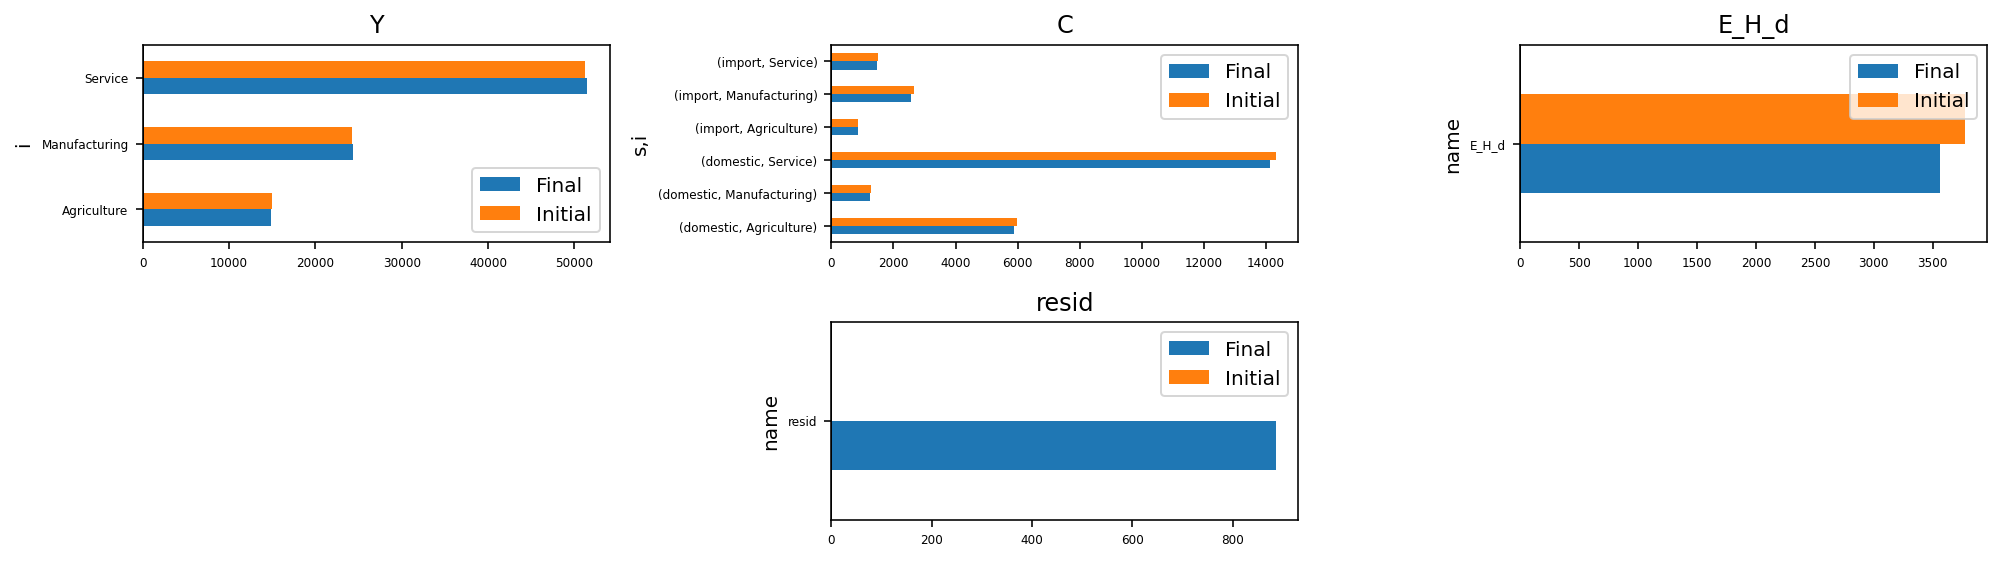

In [28]:
fig = cgp.plot_bar(
    res,
    mod,
    ["Y", "C", "E_H_d", "resid"],
    plot_together=False,
    figsize=(14, 4),
    dpi=144,
    orientation="h",
    metric="final_initial",
)

fig.tight_layout()
plt.show()

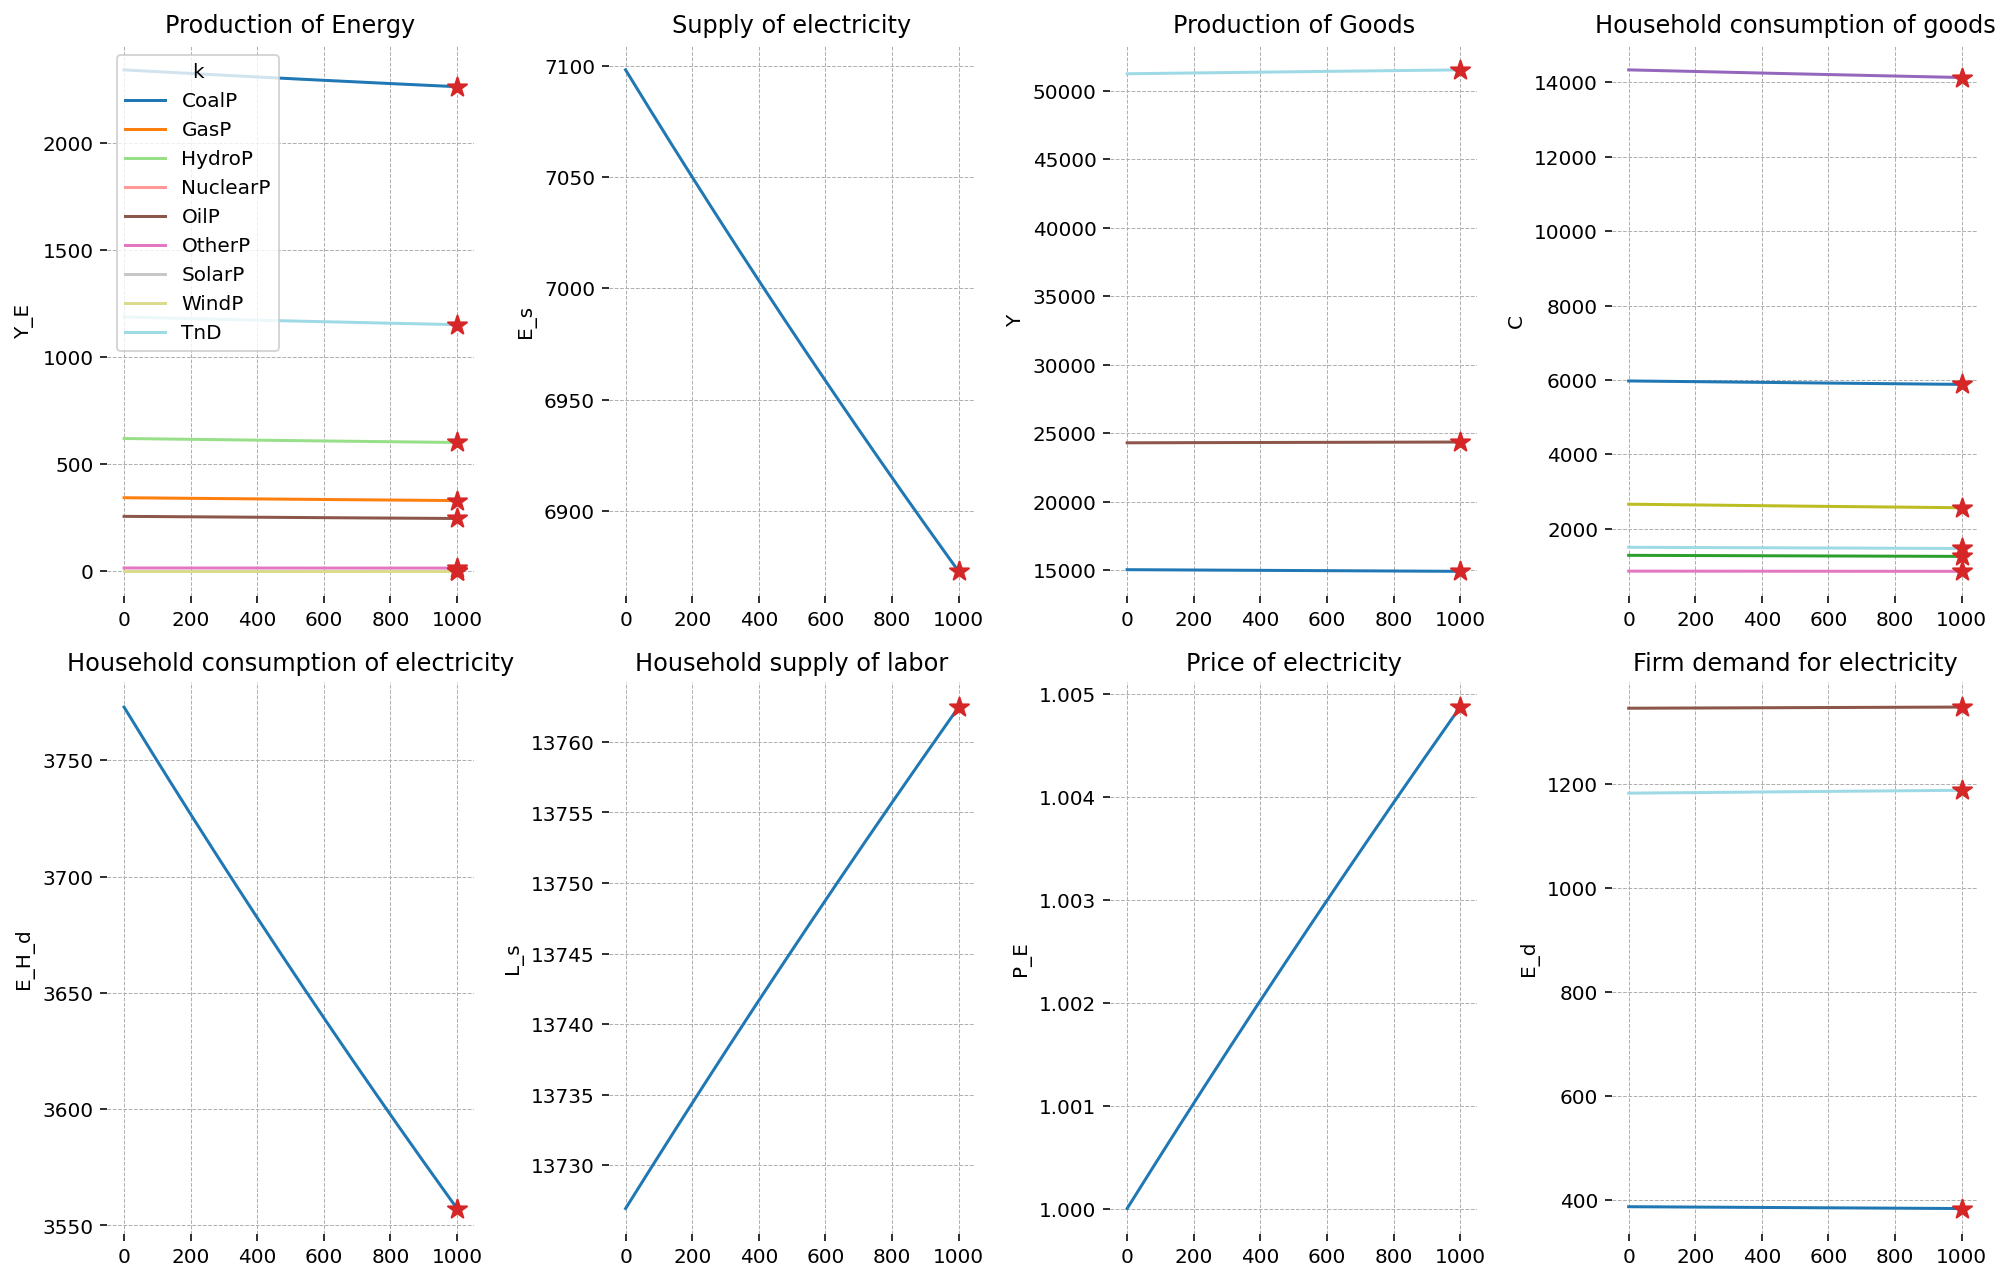

In [29]:
from cge_modeling.plotting import plot_lines

cgp.plot_lines(
    res,
    mod,
    n_cols=4,
    var_names=["Y_E", "E_s", "Y", "C", "E_H_d", "L_s", "P_E", "E_d"],
    figsize=(14, 9),
    dpi=144,
    legends=["Y_E"],
    rename_dict={
        "Y_E": "Production of Energy",
        "E_s": "Supply of electricity",
        "Y": "Production of Goods",
        "C": "Household consumption of goods",
        "E_H_d": "Household consumption of electricity",
        "L_s": "Household supply of labor",
        "P_E": "Price of electricity",
        "E_d": "Firm demand for electricity",
    },
    cmap="tab20",
);